# Homework 3
## Juan Francisco Cisneros

In [41]:
from time import time
#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        result = func(*args, **kwargs)
        return t2-t1,result
    return wrap_func

### 1. Merge two sorted lists

1. Assume you have two sorted linked lists. Use **recursion** to merge these lists and return a new sorted list. 

For example:

- Input: 

> L1 = 1 -> 3 -> 5 -> 7 -> null

> L2 = 2 -> 4 -> 6 -> null

- Output:

> L4 = 1 -> 2 -> 3-> 4 -> 5 -> 6 -> 7 -> null

2. Calculate complexity

In [42]:
import ctypes
import math
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None): #CONSTANT
        self.val = val
        self.next_node = None

    def set_next_node(self, next_node): #CONSTANT
        self.next_node = next_node


In [43]:
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None): #CONSTANT
        self.head_node = head_node

    def list_traversed(self):
        node = self.head_node
        while node:
            try:
                print(node.val)
                node = node.next_node
            except:
                print()

    def insert_head(self, new_node): #CONSTANT
        # insert to the head
        # A -> B -> null
        # R -> A -> B -> null
        new_node.set_next_node(self.head_node)
        self.head_node = new_node

    def insert_tail(self, new_node):
        # insert to the tail
        # A -> B -> null
        # A -> B -> R -> null
        node = self.head_node
        prev = None
        while node:
            prev = node
            node = node.next_node
        prev.set_next_node(new_node)

    def insert_middle(self, new_node, value):
        # insert in the middle
        # A -> B -> C -> null
        # A -> B -> R -> C -> null
        node = self.head_node
        while node.val != value:
            node = node.next_node
        if node:
            new_node.set_next_node(node.next_node)
            node.set_next_node(new_node)
        else:
            self.insert_tail(new_node)

    def delete(self,value): #O(n)
        node = self.head_node
        prev = None

        if node.val == value:
            self.head_node = self.head_node.next_node
            node.set_next_node(None)
            return node.val


        while node and node.val != value:
            prev = node
            if node.next_node != None:
                node = node.next_node
        if node:
            prev.set_next_node(node.next_node)
            node.set_next_node(None)
        else:
            raise ValueError('No value founded')

In [44]:
def mergeLists(list1,list2):
    def mergeRecursive( node1, node2):
        if (node1 == None):
            return node2
        if (node2 == None):
            return node1
        if (node1.val < node2.val):
            node1.next_node = mergeRecursive(node1.next_node, node2)
            return node1
        else:
            node2.next_node = mergeRecursive(node1, node2.next_node)
            return node2
    return Singly_linked_list(mergeRecursive(list1.head_node,list2.head_node))

In [45]:
l1 = Singly_linked_list(Node(0))
l1.insert_tail(Node(2))
l1.insert_tail(Node(4))
l1.insert_tail(Node(6))
l1.insert_tail(Node(10))
l1.list_traversed()

0
2
4
6
10


In [46]:
l2 = Singly_linked_list(Node(1))
l2.insert_tail(Node(3))
l2.insert_tail(Node(5))
l2.insert_tail(Node(7))
l2.insert_tail(Node(8))
l2.insert_tail(Node(9))
l2.insert_tail(Node(11))
l2.list_traversed()

1
3
5
7
8
9
11


In [47]:
l = mergeLists(l1,l2)

In [48]:
l.list_traversed()

0
1
2
3
4
5
6
7
8
9
10
11


The complexity of the mergeLists method is O(n), because we only traverse the lists one time in order so the max runtime is based on the numer of items that the lists have, a list can be as long as n nodes.

### 2. Implement quick sort

1. Use the divide and conquer technique to implement the quick sort algorithm studied in class. 
2. Use a couple of parragraphs to explain the steps of divide and conquer:
    - how/where do you divide?
    - where/what do you conquer?
    - how/what do you combine?
3. Analyze complexity

In [49]:
def sorting(array):

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return sorting(less)+equal+sorting(greater)

    else:
        return array

In [50]:
array = [1, 4, 2, 6, 3, 7, 5, 8]
print(sorting(array))

[1, 2, 3, 4, 5, 6, 7, 8]


We divide the array or list in three sections, the less, greater and equal to the pivot number, in this case the method chooses the first item in the array as the pivot. Every number that is equal to the pivot goes to an separated array, as well as numbers grater to the greater array and the numbers that are smaller to the pivot to the less array this is the conquer section of the method. Finally the combine section is where the grater, less and equal arrays are merged into the sorted array by concatenating the less + equal + greater arrays into the sorted final array that we return.



In this case the time complexity of the algorithm is nLog(n) this is because we do recursion R = log(n) times because we are in a tree and at the complexity of each recursion is O(s) = n. Divide and conquer uses the $O(T) = R \times O(s)$ formula, giving us a final time complexity of nLog(n)

### 3. Compare quick sort and merge sort

1. Generate 1000 random permutations of arrays of integers between 1 to 10000.
2. Execute merge sort and quick sort for each of the permutations
3. Calculate the execution time of these runs, and compare them using the statistics of the measured executed time.
4. Explain the differences. Which algorithm is better? When would you use each?

In [51]:
import random
import numpy as np

In [ ]:
arrays = []
for i in range(0,1000):
    array = np.random.permutation(10000)
    arrays.append(array)
    print(arrays[i])

In [53]:
from time import time
#https://www.geeksforgeeks.org/timing-functions-with-decorators-python/ <- IMPLEMENTATION FROM, RE WRITTED BY JUAN FRANCISCO CISNEROS
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time()*10**12
        t2 = time()*10**12
        return t2-t1
    return wrap_func

### LETS USE THE MERGE SORT ALGORITHM FROM THE PREVIOUS CLASS

In [54]:
@timer_func
def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)


def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1

    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])

    return sorted_list

In [ ]:
merge_sortTime = []
for i in range(0,1000):
    merge_sortTime.append(merge_sort(arrays[i]))
    print(merge_sortTime[i])

### LETS USE THE QUICK SORT ALGORITHM FROM THE PREVIOUS EXERCISE

In [56]:
@timer_func
def sorting(array):

    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            elif x > pivot:
                greater.append(x)

        return sorting(less)+equal+sorting(greater)

    else:
        return array

In [ ]:
quick_sortTime = []
for i in range(0,1000):
    quick_sortTime.append(sorting(arrays[i]))
    print(quick_sortTime[i])

In [58]:
import pandas as pd
df = pd.DataFrame(zip(merge_sortTime,quick_sortTime))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Merge Sort','T(n) Quick Sort',]
df

,T(n) Merge Sort,T(n) Quick Sort
0,1048576.0,2097152.0
1,786432.0,0.0
2,1048576.0,0.0
3,0.0,786432.0
4,1310720.0,0.0
...,...,...
995,0.0,1048576.0
996,0.0,0.0
997,1048576.0,0.0
998,0.0,0.0


<AxesSubplot: >

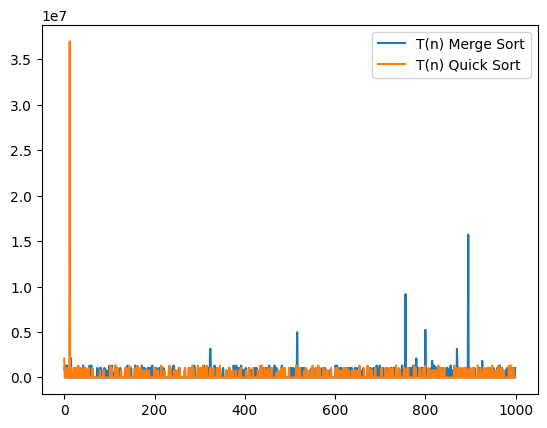

In [59]:
df.plot()

Both algorithms are equally usefull bsased on the runtime showed in the graph as well as the calculated runtime. In this case the algorithms are both based on divide and conquer,the merge sort algorithm was recycle from class and the quick sort one was implemented in the last exercise and both have an O(n) of nLog(n).

### 4. Implement factorials with recursion

Recall that a factorial number is defined as:

$k! = k \times (k-1) \times (k-2) \times ... \times 2 \times 1$

For example: $3! = 3 \times 2 \times 1 = 6$

1. Use recursion to implement the factorial
2. Run your code for numbers between 1 and 10000
3. Calculate the execution time and plot it. 
4. What's the complexity?
5. Implement memoization to improve the performance of your code
6. Measure the runtime when you calculate the factorial for numbers between 1 and 10000.
7. What's the complexity of your code using memoization?
8. How does the first implementation and the one with memoization compare?


In [62]:
def factorialNumber(k):

    if k == 0:
        return 1

    return k * factorialNumber(k-1)

In [63]:
factorialNumber(10000) #I CAN ONLY GO UP TO 1000 BECAUSE OF THE RECURSION LIMIT

RecursionError: maximum recursion depth exceeded in comparison

In [64]:
@timer_func
def factorialNumber(k):

    if k == 0:
        return 1

    return k * factorialNumber(k-1)

In [65]:
factorialCalculationTime = []
for i in range(0,1000):
    factorialCalculationTime.append(factorialNumber(i))


In [ ]:
factorialCalculationTime

In [67]:
df1 = pd.DataFrame(zip(factorialCalculationTime))  #DEFINE THE DATA FRAME
df1.columns = [ 'T(n) Factorial Runtime']
df1

,T(n) Factorial Runtime
0,2097152.0
1,0.0
2,1048576.0
3,0.0
4,0.0
...,...
995,786432.0
996,0.0
997,0.0
998,0.0


<AxesSubplot: >

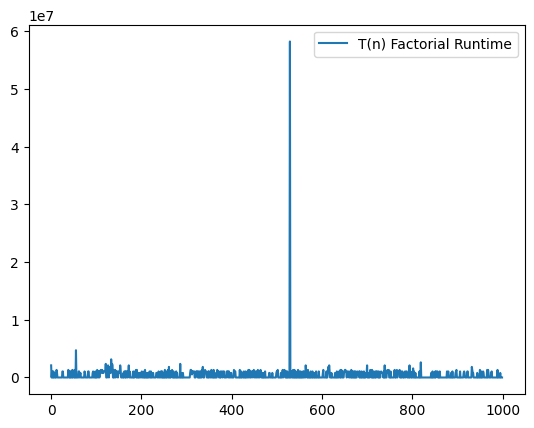

In [68]:
df1.plot()

The complexity for the factorial fucntion without memoization is O(n) because the function is called n times.

In [69]:
def factorialNumberWithMemoization(n, memory = []):
    if n in memory:
        return memory[n]
    if n == 0:
        return 1
    memory[n] = n * factorialNumberWithMemoization(n-1, memory)
    return memory[n]

In [70]:
factorialNumberWithMemoization(10000) #I CAN ONLY GO UP TO 1000 BECAUSE OF THE RECURSION LIMIT

RecursionError: maximum recursion depth exceeded in comparison

In [71]:
@timer_func
def factorialNumberWithMemoization(n, memory = []):
    if n in memory:
        return memory[n]
    if n == 0:
        return 1
    memory[n] = n * factorialNumberWithMemoization(n-1, memory)
    return memory[n]

In [72]:
factorialCalculationTimeWithMemoization = []
for i in range(0,1000):
    factorialCalculationTimeWithMemoization.append(factorialNumberWithMemoization(i))


In [ ]:
factorialCalculationTimeWithMemoization

In [74]:
df = pd.DataFrame(zip(factorialCalculationTimeWithMemoization))  #DEFINE THE DATA FRAME
df.columns = [ 'T(n) Factorial Runtime With Memoization']
df

,T(n) Factorial Runtime With Memoization
0,4980736.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,0.0


<AxesSubplot: >

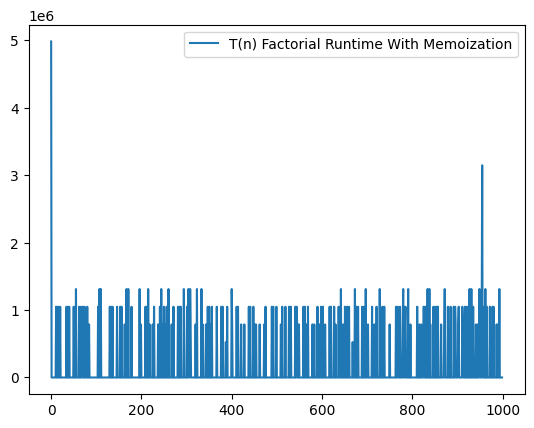

In [75]:
df.plot()

The complexity for the factorial function with memoization is O(n), but a smaller one because when we save the data from previous recursions, then we use them to calculate the factorials of bigger numbers, this helps with runtime managment.

To explain the diferences between the two functions let me graph the runtime of both functions in a single graph.

In [76]:
df2 = pd.DataFrame(zip(factorialCalculationTime,factorialCalculationTimeWithMemoization))
df2.columns = [ 'T(n) Factorial Runtime','T(n) Factorial Runtime With Memoization']
df2

,T(n) Factorial Runtime,T(n) Factorial Runtime With Memoization
0,2097152.0,4980736.0
1,0.0,0.0
2,1048576.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
995,786432.0,0.0
996,0.0,0.0
997,0.0,0.0
998,0.0,0.0


<AxesSubplot: >

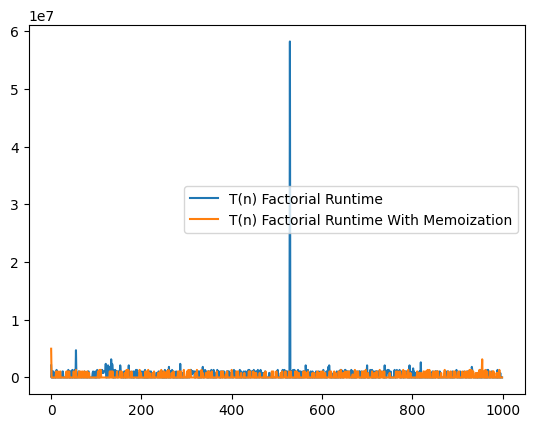

In [78]:
df2.plot()

If we compare both methods we can see that the one with memoization is faster than the one without memoization, this is because the one with memoization saves the data from previous recursions and uses them to calculate the factorials of bigger numbers, this helps with runtime managment, but still the runtime is not constant because the function is called n times.